## Statistics Notebook exercises


***

### Exercise 1
***

In [1]:
# Probability of lady correctly choosing 4 cups out of 8 with milk in first is:

1/70

0.014285714285714285

The example gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

Bonus: How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?
***


In [2]:
# Importing Math module
import math

Using comb function to choose 4 cups out of 8, adapted from:<br>
https://stackoverflow.com/a/4941932

In [3]:
# Number of way to select 4 cups out of 8.
math.comb(8,4)

70

In [4]:
# Probability of correctly choosing 4 cups out of 8 with milk first

1/math.comb(8,4)

0.014285714285714285

In [5]:
# Trying probability of correctly choosing 3 cups out of 8 with milk first

1/math.comb(8,3)

0.017857142857142856

In [6]:
# Trying probability of correctly choosing 6 cups out of 8 with milk first

1/math.comb(8,6)

0.03571428571428571

After trials in changing correct cups does not get closer to probability of less or equal to 1%. Will try to decrease likelihood of randomly selecting the correct cups by increasing sample of population.

In [7]:
1/math.comb(9,4)

0.007936507936507936

The probability of randomly selecting the correct cups is less than or equal to 1%, when sample size is 9 with 4 observations.
***

Bonus: How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?
***

We are looking to get 3 out of 4 choices correct within the sample targeting 1% probability.

In [8]:
# Checking probability the same sample size with choice of 3.
1/math.comb(9,3)

0.011904761904761904

In [9]:
# Checking probability of sample size of 10 with choice of 3.
1/math.comb(10,3)

0.008333333333333333

In [10]:
# Checking probability of sample size of 11 with choice of 3.
1/math.comb(11,3)

0.006060606060606061

Probability of choosing 4 tea cups with 3 done correctly is nearest one percent, where sample size is 10 with probability of 0.83%

***
### Exercise 2
***

Use scipy's version of Fisher's exact test to simulate the Lady Tasting Tea problem. Official documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html)

Fisher's exact test looks to identify if two categorical values have non-random/significant relationship. It is used when data can be arranged in 2x2 contingency table and one or more values is less than 5, otherwise [Chi-Square Test of Independence](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) is used.  

Lady tasting problem can be arranged in 2x2 contingency table assigning Tea tasting sample against the truth.

| Truth\Answer Received | Milk First | Tea First |
| --------------------- | ---------- | --------- |
| Milk First            |      4     |      0    | 
| Tea First             |      0     |      4    | 

In [11]:
# Importing Fisher's Exact test
from scipy.stats import fisher_exact

In [12]:
# Applying Lady's tasting contingency table to Fisher's Exact test
probvalue = fisher_exact([[4,0],[0,4]])
probvalue

(inf, 0.028571428571428536)

In [13]:
# The result we get is not the one we aimed for:
1/math.comb(8,4)

0.014285714285714285

As Fisher's Exact test defaults to two-sided test, it might be the cause to different result.

We look at the syntax options for Fisher's Exact test available in Scipy:<br>
<b>scipy.stats.fisher_exact(table, alternative='two-sided')</b><br>
First 2x2 contingency table is passed followed by optional alternative parameters:<br> ‘two-sided’- the odds ratio of the underlying population is not one.<br>
‘less’- the odds ratio of the underlying population is less than one.<br>
‘greater’- the odds ratio of the underlying population is greater than one.


As lady tasting experiment should have underlying population odds ratio greater than one, 'greater' will be used.

In [14]:
# Applying alternative 'greater' parameter
probvalue = fisher_exact([[4,0],[0,4]], alternative='greater')
probvalue

(inf, 0.014285714285714268)

Result is matching expected value with rounding difference that is overall not material.

References:<br>
https://www.cs.utah.edu/~jeffp/teaching/cs3130/lectures/L15-HypothesisTests1.pdf<br>
https://www.pluralsight.com/guides/working-tables-github-markdown<br>
https://www.reneshbedre.com/blog/fisher-exact-test-python.html<br>


***
### Exercise 3
***

Take the code from the Examples section of the scipy stats [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for independent samples t-tests, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.


#### t-Test
t-Test is statistical test to determine if there is a significant difference between the means of two populations. It is calculated by dividing variance between groups from variance within groups. [Geeksforgeeks](https://www.geeksforgeeks.org/t-test/)

* Large t-value means two groups under test belongs to different groups.
* Small t-value means two two groups under test belongs to the same groups.

The null hypothesis for t-test is that both samples are drawn from populations with the same population means. If probability is less than pre-set tolerance threshold- there are enough evidence to reject null hypothesis.

In [15]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Numpy versions released following v1.17.0 can be set up with different types of generators that provides improved statistical properties compared against legacy Mersenne Twister pseudo-random number generator. In the new version 64bit Permuted Congruential Generator is used as a default. Method uses two steps for random number generation: BitGenerator produces random values, Generator uses these values to create requested distributions equivalents. [Numpy-Random Sampling](https://numpy.org/doc/stable/reference/random/index.html)

In [16]:
# Function to generate random data, seed is applied to get reproducible data.
rng = np.random.default_rng(seed=1234)

Reproducible random data can be generated using seed parameter. It pre-sets generator to use the same pattern providing same output each time.

**stats.norm.rvs** function generates random variates with function parameters **loc**- specifying the mean, **scale**- specifying standard deviation, **size**- sets required output size where **random_state**- notes seeded or unseeded number generator.

In [17]:
# Generating two arrays of random normal distribution variates 
# Mean is set at 5, standard deviation is 10 with sample size of 500
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

# Generating t-test with equal population variance as True (default option)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.4098475436056232, pvalue=0.6820057438874886)

In [18]:
# Generating t-test with equal population variance as False (Welch's t-test)
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=0.4098475436056232, pvalue=0.6820057553900025)

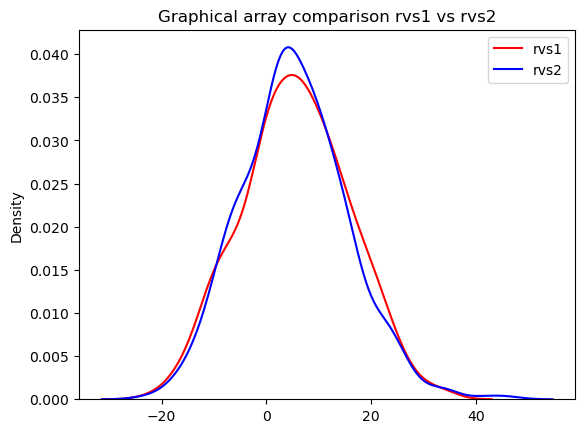

In [19]:
# Plot for generated array visualization and comparison
sns.kdeplot(rvs1, color='red', label='rvs1')
sns.kdeplot(rvs2, color='blue', label='rvs2')
plt.legend()
plt.title('Graphical array comparison rvs1 vs rvs2')
plt.show()

Both **rvs1** and **rvs2** arrays were generated using same parameters and it is evident when looking at graphical representation. t-test probability indicating samples have 68% probability of being drawn from populations with the same population mean. In other words p value is greater that common rejection thresholds of 0.05 and 0.01 and it is unlikely by chance, hence null hypothesis is not rejected.


In [20]:
# Generating array of random normal distribution variates
# Mean is set at 5, standard deviation is 20 with sample size of 500
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)

# Generating t-test with equal population variance as True (default option)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=0.33048545845760036, pvalue=0.7411025439476999)

In [21]:
# Generating t-test with equal population variance as False (Welch's t-test)
stats.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=0.33048545845760036, pvalue=0.7411255633899936)

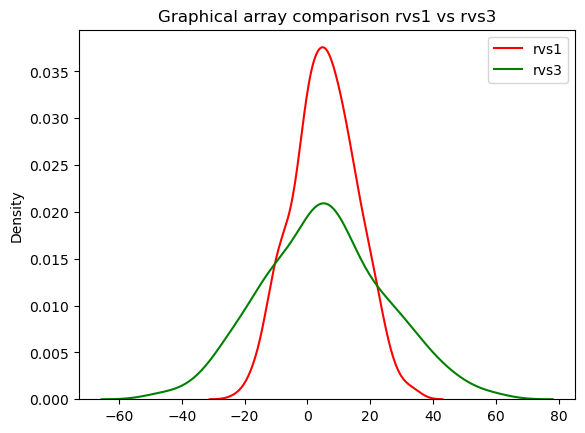

In [22]:
# Plot for generated array visualization and comparison
sns.kdeplot(rvs1, color='red', label='rvs1')
sns.kdeplot(rvs3, color='green', label='rvs3')
plt.legend()
plt.title('Graphical array comparison rvs1 vs rvs3')
plt.show()

**rvs3** array has a standard deviation of 20 where **rvs1** has a standard deviation of 10 with the rest of parameters being the same.
p value is greater that common rejection thresholds of 0.05 and 0.01 using classic and Welch T-test, null hypothesis is not rejected.

In [23]:
# Generating array of random normal distribution variates
# Mean is set at 5, standard deviation is 20 with sample size of 100
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)

# Generating t-test with equal population variance as True (default option)
stats.ttest_ind(rvs1, rvs4)

Ttest_indResult(statistic=2.8810013622800024, pvalue=0.004106273614223087)

In [24]:
# Generating t-test with equal population variance as False (Welch's t-test)
stats.ttest_ind(rvs1, rvs4, equal_var=False)

Ttest_indResult(statistic=1.8912446152540754, pvalue=0.06124021938844714)

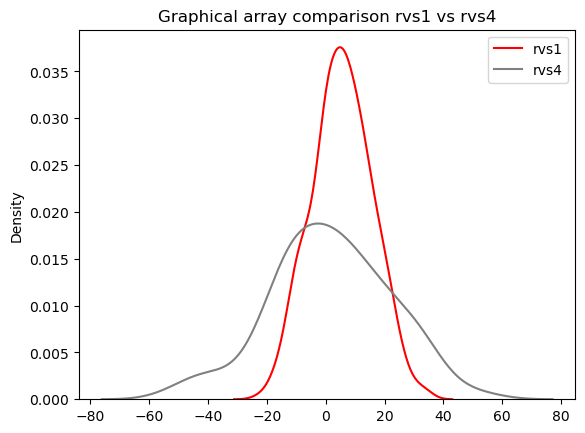

In [25]:
# Plot for generated array visualization and comparison
sns.kdeplot(rvs1, color='red', label='rvs1')
sns.kdeplot(rvs4, color='gray', label='rvs4')
plt.legend()
plt.title('Graphical array comparison rvs1 vs rvs4')
plt.show()

**rvs1** array has a standard deviation of 20 and size of 100 where **rvs4** has a standard deviation of 10 and size of 100 with the rest of parameters being the same.
p value is lower that common rejection thresholds of 0.05 and 0.01 using classic T-test. Welch T-test does not breach the tolerance threshold, null hypothesis is only rejected under classic T-test that assumes equal population variance.

In [26]:
# Generating array of random normal distribution variates
# Mean is set at 8, standard deviation is 20 with sample size of 100
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)

# Generating t-test with equal population variance as True (default option)
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-1.8645185923243452, pvalue=0.06273860321266717)

In [27]:
# Generating t-test with equal population variance as False (Welch's t-test)
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-1.2734001112083875, pvalue=0.2055376504741812)

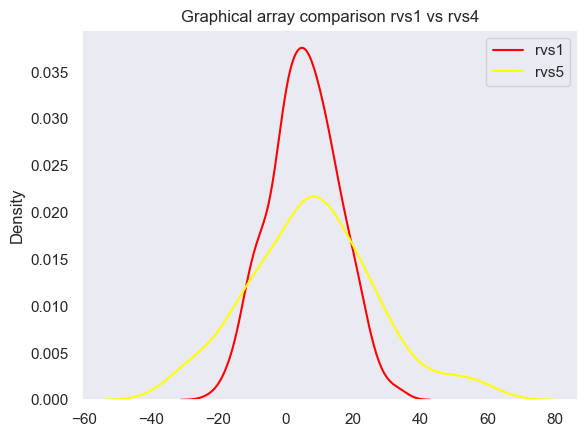

In [28]:
# Plot for generated array visualization and comparison
sns.set_theme(style="dark")
sns.kdeplot(rvs1, color='red', label='rvs1')
sns.kdeplot(rvs5, color='yellow', label='rvs5')
plt.legend()
plt.title('Graphical array comparison rvs1 vs rvs4')
plt.show()

**rvs5** array has a standard deviation of 20, mean value of 7 with sample size of 100 where **rvs1** has a standard deviation of 10, mean value of 5 with sample size of 500.
p value is greater that common rejection thresholds of 0.05 and 0.01 using classic and Welch T-test, null hypothesis is not rejected.

In [29]:
stats.ttest_ind(rvs1, rvs5, permutations=10000, random_state=rng)

Ttest_indResult(statistic=-1.8645185923243452, pvalue=0.0637)

Permuted is shuffled copy of an array. It does not materially affect probability value and does not have impact in this scenario to reject null hypothesis.

In [ ]:
# Two data touples
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

: 

In [31]:
# Generating T-test for a and b 
stats.ttest_ind(a, b)

Ttest_indResult(statistic=1.099305186099593, pvalue=0.30361296704535845)

In [32]:
# Generating T-test for a and b adding trim parameter
stats.ttest_ind(a, b, trim=.2)

Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)

**Trim parameter** - enables Yuen’s t-test: number of elements trimmed from each tail is the floor of the trim times the number of elements.

References:<br>
https://en.wikipedia.org/wiki/Student's_t-test<br>
https://www.geeksforgeeks.org/t-test/<br>
https://www.investopedia.com/terms/t/t-test.asp<br>
https://www.statology.org/welchs-t-test/<br>

# The end.